## <center> Visualizing Amounts in Finance with Python </center>

> #### Loading the libraries

In [20]:
# Data and Visualization libraries
# Importing required libraries
import pandas as pd
import numpy as np
import datetime
#from pandas_datareader import data as pdr
from functools import reduce

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
%matplotlib inline

#import matplotlib.ticker as ticker

# Custom Legends
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#### <span style='color:green'> Please Note : </span>
    
    Create a free Quandl account and set your API key in a local config file or include the code directly in 
    your script as mentioned below:
                          
           my_quandl_sk = "<your secret key goes here>"
           quandl.ApiConfig.api_key = my_quandl_sk
    
        
    For more information, refer to :
    https://www.quandl.com/tools/python 


In [21]:
# Data API libraries
# Importing config_file to retrieve secret key for quandl
import quandl
import local_config_file # includes the secret key for quandl
import yfinance as yf

> #### Configuration settings

In [46]:
# Initial configuration for visualization
# Most popular styles include fivethirtyeight, seaborn-whitegrid, ggplot, bmh and others
plt.style.use('bmh')
mpl.rcParams['font.family'] = 'serif' 

### <center>  Data Wrangling </center>


### <center> Step 1 : Discovering Data </center>

    The first step of any data visualization process starts at discovering data. Data can be either imported as 
    a flat file or can be pulled from a data API.
    In this jupyter notebook we will be working with data directly from data API like Quandl/Yahoo Finance. 
    
    The purpose of this is mainly to take advantage of the fact that the data set is updated extremely 
    frequently and this is quite useful for financial data.We will be using data of the following in the 
    visualizations below.
    
    - Precious metals(updated daily)
    - Base metals(updated monthly) and 
    - CPI(updated monthly) 
    

> #### Dataset 1 : Precious Metal Prices
    
    Description : This dataset consists of precious metal prices. The prices reflect LBMA price auctions that 
    take place in London on a daily basis for Gold, Silver, Platinum and Palladium. All of these prices are 
    internationally regarded as the pricing mechanism for a variety of precious metal transactions and products.
    The LBMA Global Benchmark Prices for gold, silver, platinum and palladium is owned by The London Bullion 
    Market Association (“LBMA”), calculated and administered by IBA.

    Data Source : For more information refer the website http://www.lbma.org.uk/precious-metal-prices#/

In [23]:
# Using Quandl API : Import prices of Precious Metals ( Gold, Silver, Platinum, Palladium )
# https://www.quandl.com/tools/python

# Gold Price: London Fixing
gold = quandl.get("LBMA/GOLD")

# Silver Price: London Fixing
silver = quandl.get("LBMA/SILVER")

# Platinum Fixing
platinum = quandl.get("LPPM/PLAT")

# Palladium
palladium = quandl.get("LPPM/PALL")

> #### Dataset 2 : Non-Ferrous Base Metal Prices / LME's Base Metal Future Contracts
    
    Description : This dataset consists of non-ferrous base metal prices. The prices reflect the trading prices 
    of aluminum, copper, lead, nickel, zinc and tin on LME(The London Metal Exchange).
    The Price quotation of these base metals is in US dollars per metric tonne.
       
    Data Source : For more information refer https://www.lme.com/Metals

In [24]:
# Non-Ferrous Base Metals (Aluminum; Copper; Lead; Nickel; Tin and Zinc)

# Aluminum; 99.5% minimum purity; LME spot price; CIF UK ports; US$ per metric ton
aluminium = quandl.get("ODA/PALUM_USD")

# Copper; grade A cathode; LME spot price; CIF European ports; US$ per metric ton
copper = quandl.get("ODA/PCOPP_USD")

# Lead; 99.97% pure; LME spot price; CIF European Ports; US$ per metric ton
lead = quandl.get("ODA/PLEAD_USD")

# Nickel; melting grade; LME spot price; CIF European ports; US$ per metric ton
nickel = quandl.get("ODA/PNICK_USD")

# Tin; standard grade; LME spot price; US$ per metric ton
tin = quandl.get("ODA/PTIN_USD")

# Zinc; high grade 98% pure; US$ per metric ton
zinc = quandl.get("ODA/PZINC_USD")


> ####  Dataset 3 : Consumer Price Index for All Urban Consumers (CPI-U)

    The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban 
    consumers for a market basket of consumer goods and services. Indexes are available for the U.S. and various 
    geographic areas. This dataset consists of Consumer Price Index for All Urban Consumers for various
    Categories and it includes U.S. City Average for All Items,Food and Beverages, All Items Less Food and 
    Energy, Recreation, Housing, Education and Communication, Apparel, Energy,Other Goods and Services, 
    Transportation, Services, Commodities and Medical Care.
    
    Area	  : U.S. city average
    Units     : Index 1982-1984=100,Seasonally Adjusted
    Frequency : Monthly
    
    Data Source : For more information refer Consumer Price Index for All Urban Consumers in the websites for
    U.S. Bureau of Labor Statistics : https://www.bls.gov/cpi/
                                      https://fred.stlouisfed.org/categories/9?t=sa&ob=pv&od=desc

In [25]:
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average 
monthly_allitems = quandl.get("FRED/CPIAUCSL") 

# Consumer Price Index for All Urban Consumers: Food and Beverages in U.S. City Average
monthly_foodbev = quandl.get("FRED/CPIFABSL") 

# Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average
monthly_excfoodnbev = quandl.get("FRED/CPILFESL")  

# Consumer Price Index for All Urban Consumers: Recreation in U.S. City Average
monthly_recreation = quandl.get("FRED/CPIRECSL") 

# Consumer Price Index for All Urban Consumers: Housing in U.S. City Average 
monthly_housing = quandl.get("FRED/CPIHOSNS") 

# Consumer Price Index for All Urban Consumers: Education and Communication in U.S. City Average
monthly_eduncomm = quandl.get("FRED/CPIEDUSL") 

# Consumer Price Index for All Urban Consumers: Apparel in U.S. City Average
monthly_apparel = quandl.get("FRED/CPIAPPSL") 

# Consumer Price Index for All Urban Consumers: Energy in U.S. City Average
monthly_energy = quandl.get("FRED/CPIENGSL") 

# Consumer Price Index for All Urban Consumers: Other Goods and Services in U.S. City Average
monthly_othergns = quandl.get("FRED/CPIOGSSL") 

# Consumer Price Index for All Urban Consumers: Transportation in U.S. City Average 
monthly_trnsprt = quandl.get("FRED/CPITRNSL") 

# Consumer Price Index for All Urban Consumers: Services in U.S. City Average 
monthly_otherserv = quandl.get("FRED/CUSR0000SAS") 

# Consumer Price Index for All Urban Consumers: Commodities in U.S. City Average
monthly_commod = quandl.get("FRED/CUSR0000SAC") 

# Consumer Price Index for All Urban Consumers: Medical Care in U.S. City Average
monthly_medcare = quandl.get("FRED/CPIMEDSL") 

### <center> Step 2 : Data Cleaning and Transformation </center>

>##### CPI Data

In [36]:
# Merging the datasets
cpi_merge = [monthly_allitems,
             monthly_foodbev,
             monthly_excfoodnbev,
             monthly_recreation,
             monthly_housing,
             monthly_eduncomm,
             monthly_apparel,
             monthly_energy,
             monthly_othergns,
             monthly_trnsprt,
             monthly_otherserv,
             monthly_commod,
             monthly_medcare]

# Merging the datasets into one dataframe
cpi_df = reduce(lambda left,right: pd.merge(left,right,on='Date',how='outer'), cpi_merge)

# Renaming the columns
cpi_df.columns = ["CPI","FoodnBeverage","CoreCPI","Recreation","Housing","EducationComm","Apparel","Energy",
                  "OtherGoodsnServices","Transport","OtherServices","Commodity","MedCare"]

# Creating a dataset with CPI monthly index for all the categories
cpi_monthly=(
cpi_df
 .dropna()
 .reset_index()
 .melt(id_vars="Date",
       value_vars=["CPI","FoodnBeverage","CoreCPI","Recreation","Housing","EducationComm","Apparel","Energy",
                  "OtherGoodsnServices","Transport","OtherServices","Commodity","MedCare"],
       var_name="Category",
       value_name="Index")
 .assign(Date = lambda df_ :pd.to_datetime(df_.Date),
         Year = lambda df_ : df_.Date.dt.year,
         Month = lambda df_ : df_.Date.dt.month,
        )
 .groupby(['Year','Month','Category'])
 .min()
)

# Annual Average change in CPI for all the Categories for the year 2020
cpi_annualavg =(
cpi_monthly
.query('Year>=1994 and Year<2020')
.Index
.reset_index()
.groupby(['Category','Year'])
.mean()['Index']
.to_frame()
.assign(AnnualAvgChange = lambda df_ : (df_.Index/df_.Index.shift(1) - 1)*100,
        PurchasingPower =  lambda df_ : (df_.Index/df_.Index.shift(1))*100 )
.dropna()
.reset_index()
#.query('Year == 2019')
.sort_values('AnnualAvgChange'#,ascending=False
            )
)


> #### Historical data of precious Metal Prices(2001-Present)

In [27]:
# Datasets for base metals
preciousmetals_gold = gold['USD (AM)'].to_frame().rename({'USD (AM)':'Gold'}, axis=1).reset_index()
preciousmetals_silver = silver['USD'].round(2).to_frame().rename({'USD':'Silver'}, axis=1).reset_index()
preciousmetals_platinum = platinum['USD AM'].to_frame().rename({'USD AM':'Platinum'}, axis=1).reset_index()
preciousmetals_palladium = palladium['USD AM'].to_frame().rename({'USD AM':'Palladium'}, axis=1).reset_index()

# Merging the datasets
dfs = [preciousmetals_gold,preciousmetals_silver,preciousmetals_platinum,preciousmetals_palladium]
preciousmetals_df = reduce(lambda left,right: pd.merge(left,right,on='Date',how='outer'), dfs)

# Inspecting missing values
preciousmetals_df.isna().any(axis=0)
preciousmetals_df.isna().sum()

# Tidying the dataset : Historical data of base Metals Prices(2001-2019)
preciousmetals=(
preciousmetals_df
.dropna()
.melt(id_vars="Date",
      value_vars=["Gold","Silver","Platinum","Palladium"],
      var_name="Metal",
      value_name="Price")
.assign(Date = lambda df_ :pd.to_datetime(df_.Date),
        Year = lambda df_ : df_.Date.dt.year)
.drop(['Date'], axis=1)
.query('Year>=2001')
)

> ##### Historical data of non-ferrous base Metals Prices(2001-Present)

In [28]:
# Basic Data Manipulation of basemetals dataset
base_df = [aluminium,copper,lead,nickel,tin,zinc]
basemetals = reduce(lambda left,right: pd.merge(left,right,on='Date',how='outer'), base_df)
basemetals.columns=["Aluminium","Copper","Lead","Nickel","Tin","Zinc"]

### <center> Step 3 : Data Visualization </center>
## <center> Visualizing Amounts </center>
    
    Data visualization involves preparing data for analysis and visualization followed by the visualization 
    itself. Preparing the data in turn includes several stages from identifying the data table, having
    appropriate headers, handling missing values, appropriate aggregation and summaries and adjusting the data 
    layout for a optimal code for the design of the visualization in question.
    
    In this notebook, we will discuss some of the visualizations used for visualizing amounts.
    Most commonly used visualizations to compare amounts include:

    1. Bar Charts
    2. Diverging Bar Charts    
    3. Stacked Bar Charts
    4. Grouped Bar Charts (also called Clustered Bar Charts)
    5. Animated Bar Charts
    6. Dot Plots (also called Cleveland Dot Charts)
    7. Bubble Charts
    8. Heatmaps

    Others include :
    9.  Waterfall Charts
    10. Polar Area Charts (also called Coxcomb Charts)
    11. Dumbbell Charts
    
    

> #### Bar plot : Historical Gold Prices

Text(0.5, 1.0, 'Historical Gold Prices(1968-2020)')

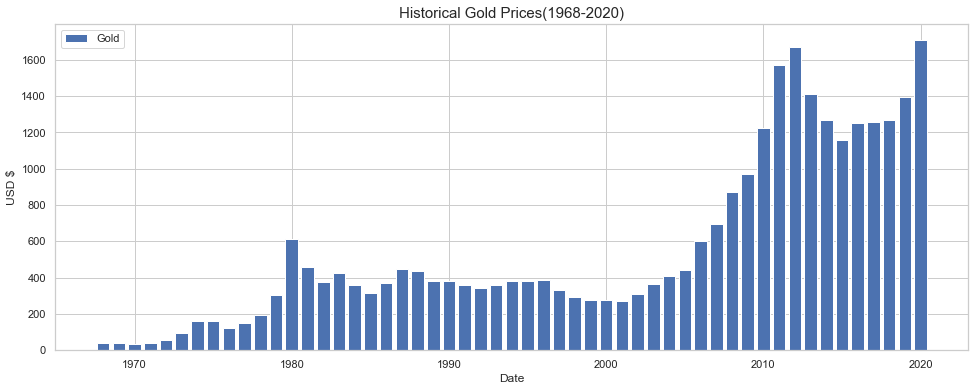

In [95]:
# Format column names
def clean_columns(col):
    return col.replace(' (AM)','_am').replace(" (PM)","_pm")

# Gold Prices dataset 
gold_prices = (gold
.rename(columns = clean_columns)
.USD_am
.to_frame()
.resample("Y") 
.mean().round(3)
.reset_index()
.assign(Date = lambda df_ :pd.to_datetime(df_.Date),
        Year = lambda df_ : df_.Date.dt.year) 
)

# Simple bar plot using the gold_prices dataset
plt.figure(figsize=(36, 6))
plt.subplot(121)
plt.bar(gold_prices['Year'],gold_prices['USD_am'],width = 0.8,label='Gold')  
plt.legend(loc=0)
plt.xlabel('Date')
plt.ylabel('USD $')
plt.title('Historical Gold Prices(1968-2020)',fontsize=15)

> #### Diverging Horizontal Bar Plot : CPI Data

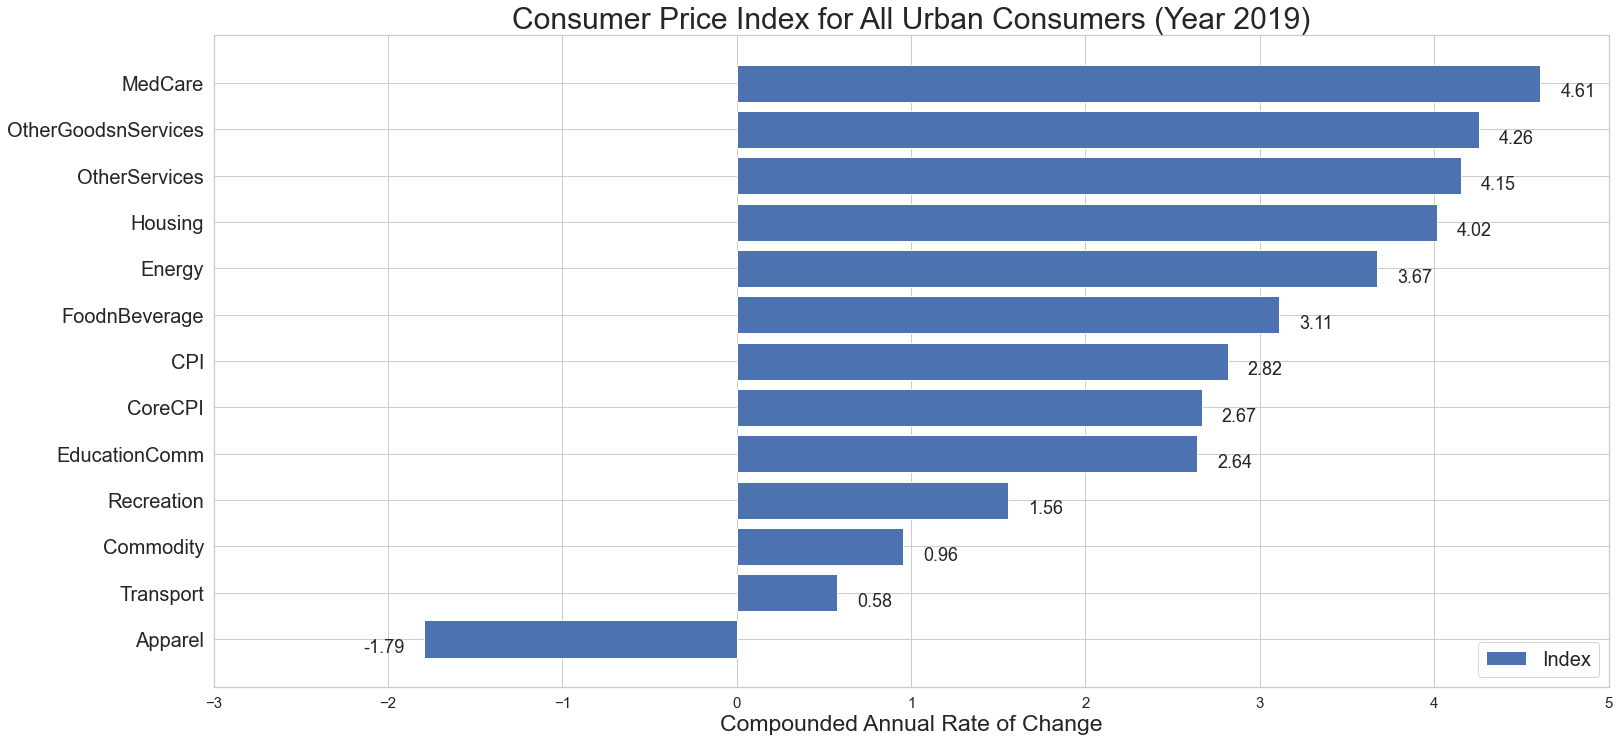

In [91]:
# Bar Plot for the Consumer price index for all the categories for the year 2019
cpi = cpi_annualavg.query('Year==2001')

plt.figure(figsize=(25, 12))
plt.barh(list(cpi['Category']),
         cpi['AnnualAvgChange'],
         label="Index")
plt.legend(loc=4,fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Compounded Annual Rate of Change',fontsize=23)
plt.title('Consumer Price Index for All Urban Consumers (Year 2019)',fontsize=30)
plt.xlim((-3, 5))

# Adding text annotation to the bar plot
for category,index in zip(list(cpi['Category']),list(cpi['AnnualAvgChange'])):
    dx = cpi['AnnualAvgChange'].max()/40
    if index <0:
        offset = -3*dx
    else:
        offset = dx
    plt.annotate(round(index,2),
                 xy=(index+offset,category),
                 xytext=(index+offset,category),
                 size = 18,
                 horizontalalignment='left', 
                 verticalalignment='top')


> #### Stacked Bar plot :  Base metal prices

<AxesSubplot:title={'center':'Precious Metals Prices History(2001-2020)'}, xlabel='Year'>

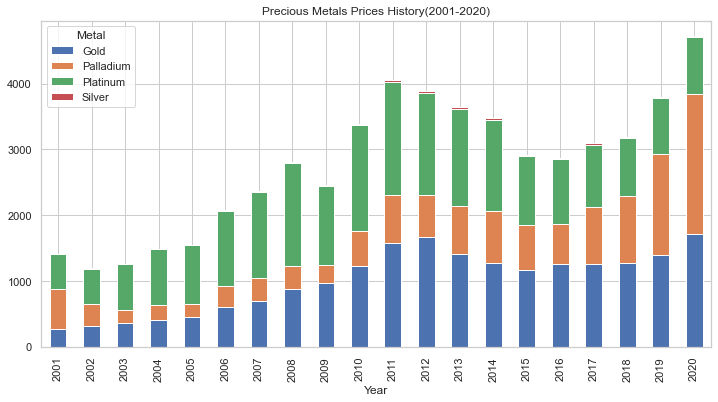

In [86]:
# Dataset in wide format for every year
stacked_preciousmetals=(
preciousmetals
.groupby(['Metal','Year'])
.mean()['Price']
.unstack(level=0)
)

# Stacked Bar plot using pandas plotting functions
stacked_preciousmetals.plot.bar(stacked=True, figsize=(12,6),title="Precious Metals Prices History(2001-2020)")

> #### Grouped Bar plot :  Base metal prices

Text(0.5, 1.0, 'Historical Precious Metal Prices(2001-2020)')

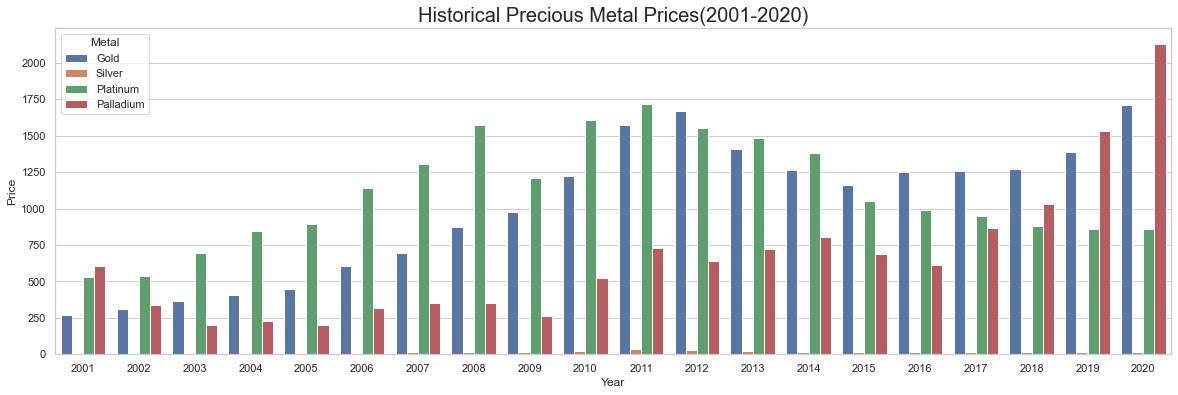

In [84]:
# Grouped bar plot using Seaborn
import seaborn as sns
plt.figure(figsize=(20,6))
sns.set(style="whitegrid")
sns.barplot(x='Year',
            y='Price',
            hue='Metal',
            data=preciousmetals,
            ci=None).set_title("Historical Precious Metal Prices(2001-2020)",fontsize=20)

#### Animated Bar Chart : CPI

In [43]:
# CPI Annual Average by Category:
import matplotlib.animation as animation
from IPython.display import HTML

# Assign colors to the bars
barplot_cpi =(
cpi_annualavg
.drop(["Index","PurchasingPower"], axis=1)
.assign(Color = lambda df_ : ['red' if (x < 0) else 'green' for x in df_.AnnualAvgChange ])
.query('Year>=1995')
)

# Bar plot function to generate plots for a given year
def draw_barplot(year):
    # Input Dataset
    df = barplot_cpi[barplot_cpi['Year'].eq(year)]
    ax.clear()
    # Horizontal bar plot of CPI for all categories
    ax.barh(df['Category'], df['AnnualAvgChange'], color=df['Color'])    
    # Adding text to all the labels
    for value, name in zip(df['AnnualAvgChange'], df['Category']):
        dx = barplot_cpi['AnnualAvgChange'].max() / 200
        if index <0:
            offset = -7*dx
            alignment = "right"
        else:
            offset = dx
            alignment = "left"
        ax.text(value+offset,name,f'{value:,.2f}',size=14, ha='left',  va='center',fontsize=20) # AnnualAvgChange : value
        ax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')
    # Plot Style customization
    plt.yticks(fontsize=20)
    plt.title('Consumer Price Index for All Urban Consumers',fontsize=30)
    plt.xticks([])

    plt.box(False)

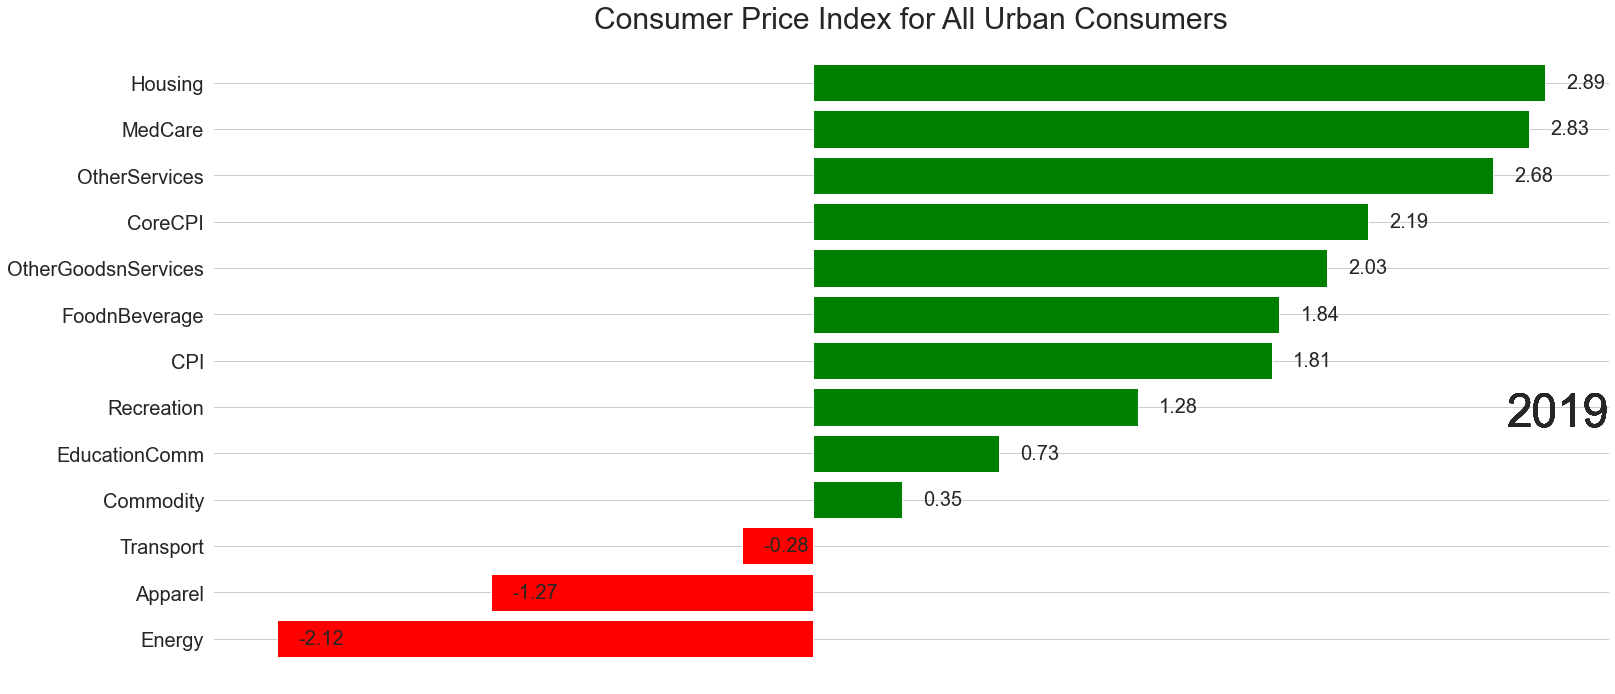

In [93]:
# Creating an animation using the function for barplot
fig, ax = plt.subplots(figsize=(25, 12))  
animator = animation.FuncAnimation(fig, draw_barplot, frames=range(1995, 2020))
HTML(animator.to_jshtml()) 

#### Basic Dot Plot : Historical Gold Prices

Text(0.5, 1.0, 'Dot plot of Gold Fixing Price 10:30 A.M.(London time) in London Bullion Market')

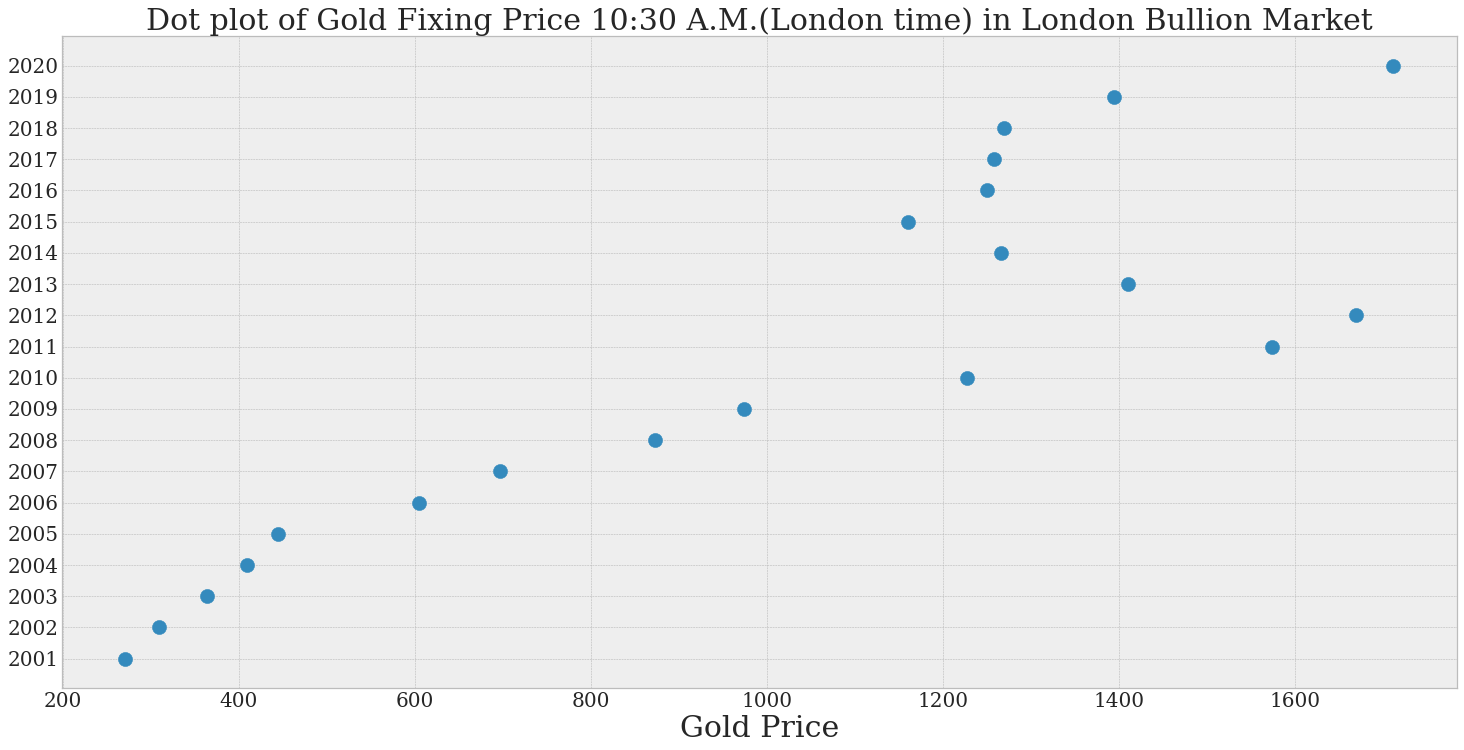

In [47]:
# Format column names
def clean_columns(col):
    return col.replace(' (AM)','_am').replace(" (PM)","_pm")

# Tidy dataset for the dot plot
goldprices_df =(
gold
.rename(columns = clean_columns)
.rename({'USD_am':'price'}, axis=1)
.filter(['price','Date'],axis=1)
.reset_index()
.assign(Date = lambda df_ :pd.to_datetime(df_.Date),
        Year = lambda df_ : df_.Date.dt.year)
.drop('Date',axis=1)
.query('Year>=2001')
.groupby('Year')
.mean()['price']
.to_frame()
.reset_index()
.assign(Year = lambda df_ : df_.Year.astype(str))
)

# Dot plot of Gold Fixing Price 10:30 A.M.(London time) in London Bullion Market
plt.figure(figsize=(25, 12))
plt.scatter(goldprices_df['price'],goldprices_df['Year'],s=200)
plt.xlabel("Gold Price",fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Dot plot of Gold Fixing Price 10:30 A.M.(London time) in London Bullion Market",size=30)

#### Dot plots for Comparing multiple Points of Information:  
    
    Cleveland dot plots offers lots of advantages over simple bar charts in terms of reducing the clutter and 
    drawing focus to several aspects which is difficult to achieve with bar chart.
    
    Consider the case where we want to compare the rate of inflation of any two chosen years. Suppose the user 
    wants to know the categories which had inflation changes exceeding 20%. Although this information is too 
    elaborate to be displayed with a bar chart, it can be easily viewed with Cleveland Dot plots.
    
    We will highlight only those categories which have inflation changes exceeding 20%.

> #### Dot plot : Inflation changes 


Please Enter first year:2019

Please Enter a second year for comparison:2018


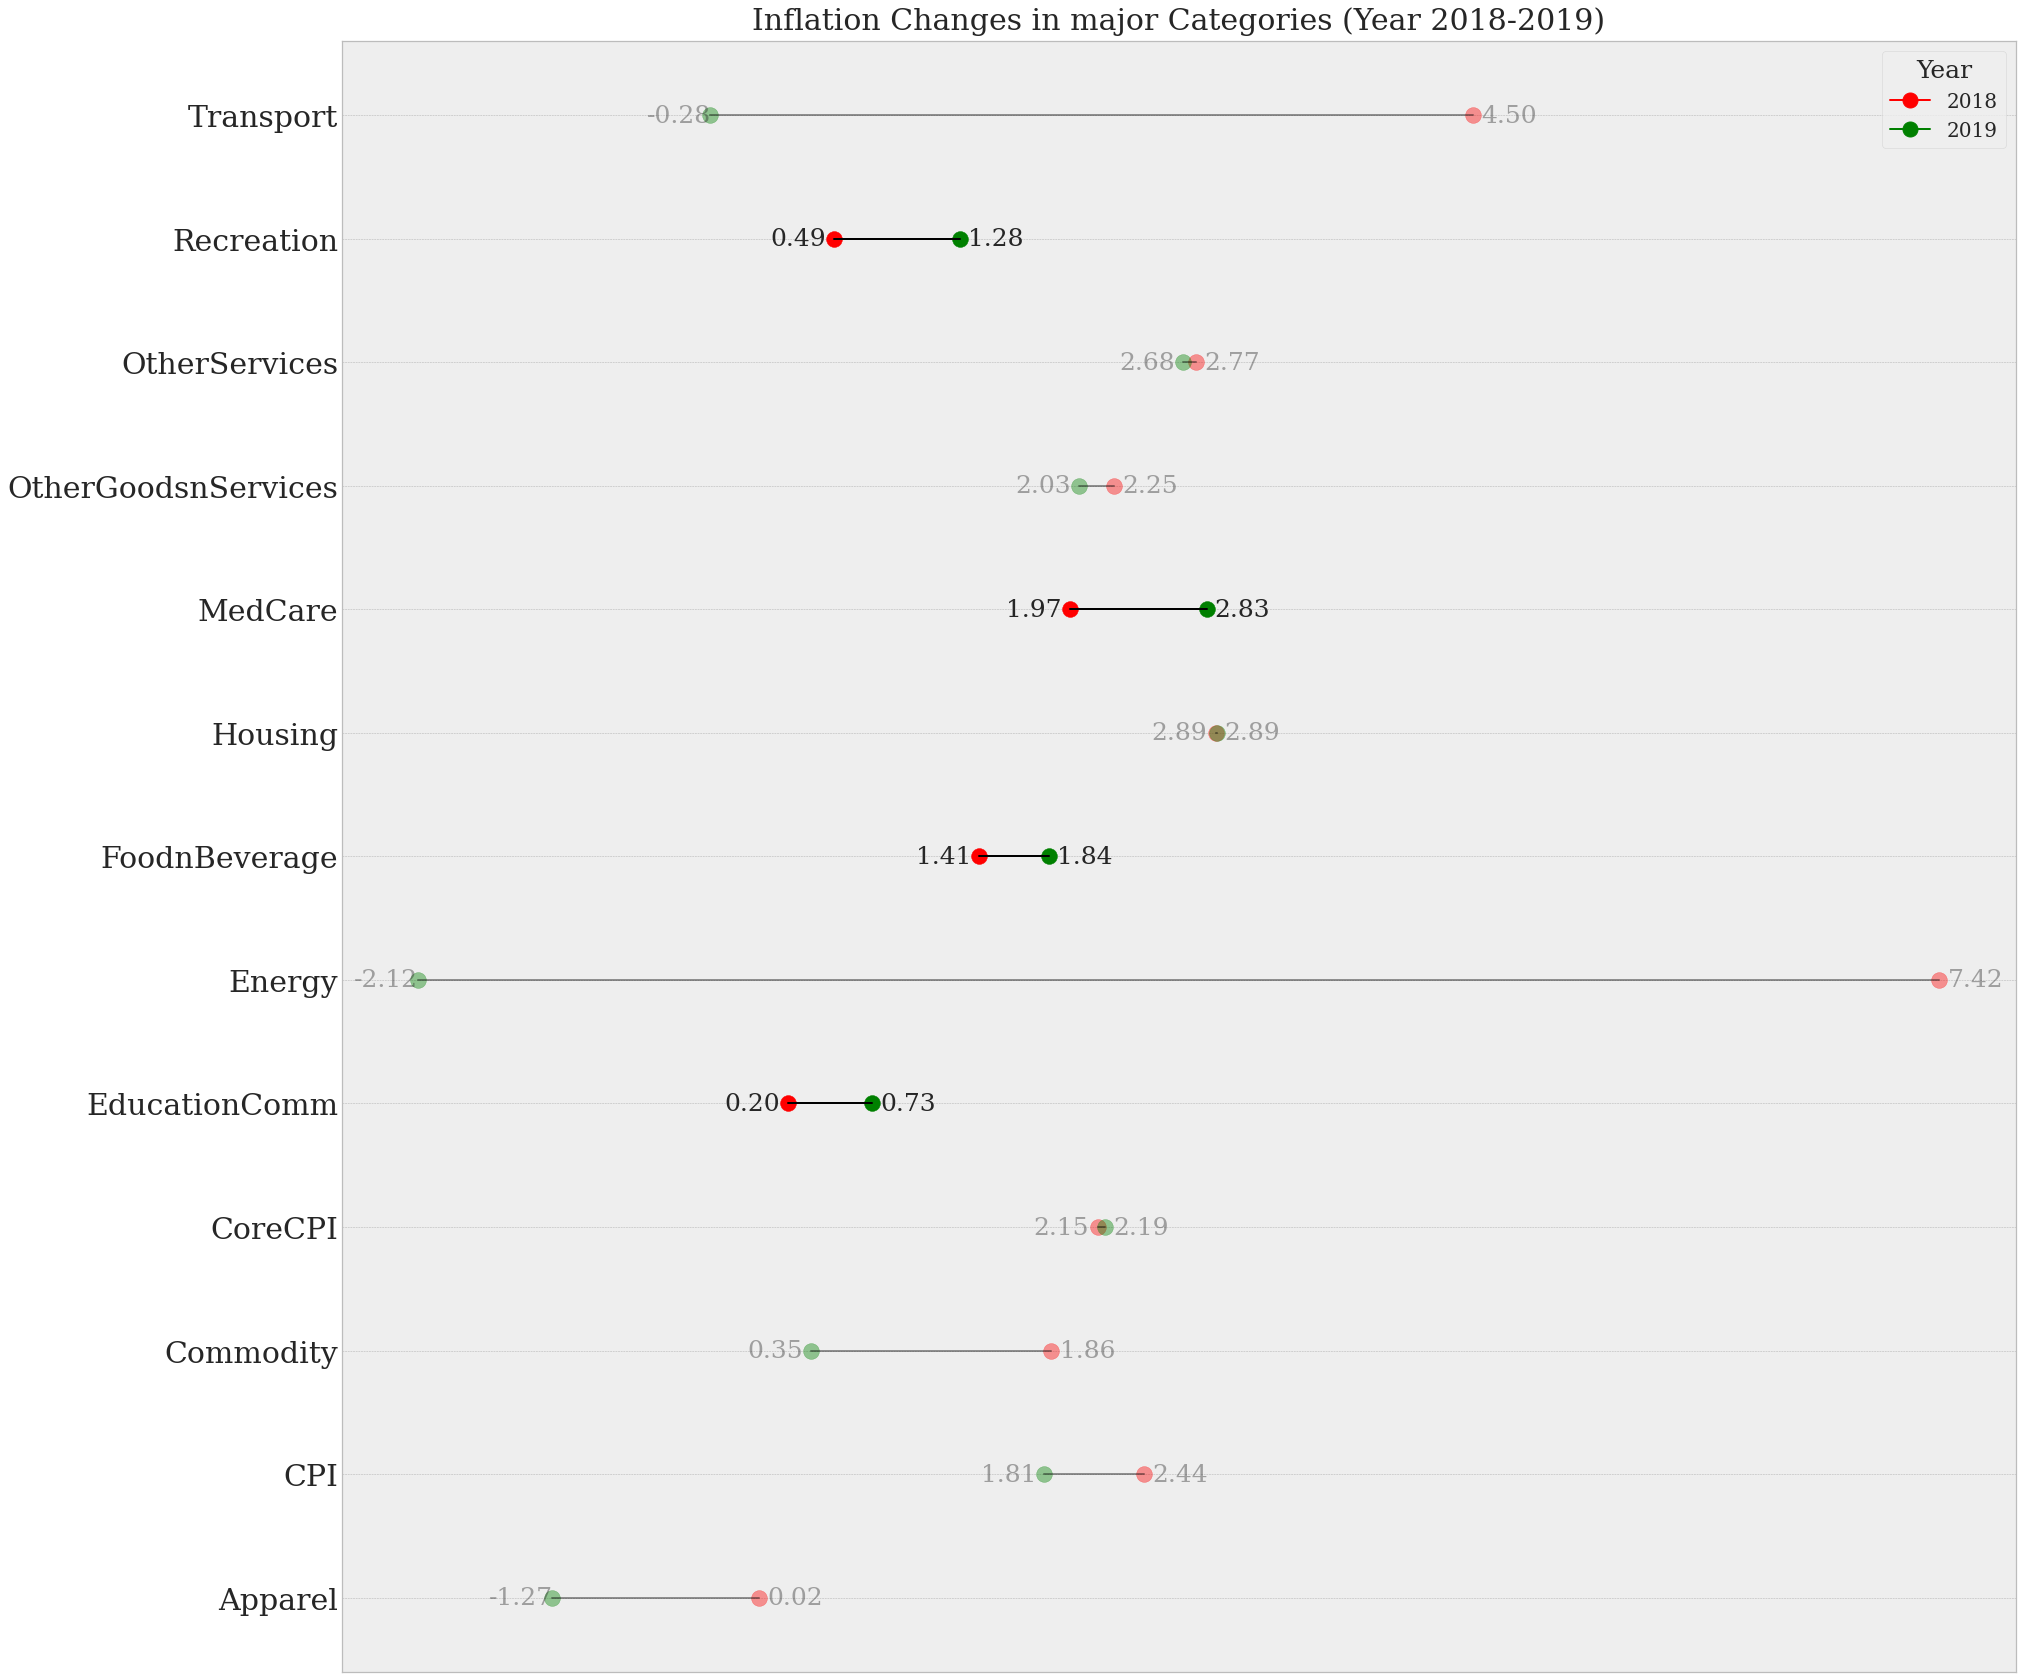

In [48]:
# Plots dot plot showing changes in CPI from chosen years of comparison in all major categories

# Function to take user input : Enter years for comparison
def get_years_for_comparison(df):
    while True:
        try:
            year_1, year_2 = int(input(f"\nPlease Enter first year:")),int(input(f"\nPlease Enter a second year for comparison:"))
            if type(year_1)==int and year_1>1994 and year_1<=(datetime.datetime.now().year - 1) and type(year_2)==int and year_2>1994 and year_2<=(datetime.datetime.now().year - 1) :
                df = df.query('Year==@year_1 or Year==@year_2')
                break 
            elif year_1==year_2:
                print(f"\n Same year cannot be compared")
            else:
                print(f"\n{year_1} and {year_2} should be a year between 1994 and {datetime.datetime.now().year}!")
        except:
                print(f"\n One of the inputs is not a number!")
    return df

# Data manipulation
cpi_comp =(
cpi_annualavg
.pipe(get_years_for_comparison)
.pivot(index='Category', columns='Year', values='AnnualAvgChange')
.reset_index()
# Filtering data frame to highlighting Categories where the inflation changes exceeds 20%.
.assign(inflation = lambda df_:  df_.iloc[:,2]/df_.iloc[:,1],
        highlight = lambda df_:[1.0 if (i-1 > 0.2) else 0.4 for i in df_.inflation])
.assign(left_label = lambda df_:[min(df_.iloc[i,1],df_.iloc[i,2]) for i in range(len(df_.Category))],
        right_label =lambda df_:[max(df_.iloc[i,1],df_.iloc[i,2]) for i in range(len(df_.Category))]))


# Dot plot comparing CPI for chosen years
plt.figure(figsize=(30, 30))

# for loop needed for highlighting chosen categories that exceed 20% change in inflation
for i in range(len(cpi_comp['Category'])):
    # Plots labels
    plt.text(cpi_comp.iloc[i,-1]+0.4,cpi_comp['Category'][i],f'{cpi_comp.iloc[i,-1]:.2f}',fontsize = 25,alpha=cpi_comp['highlight'][i],ha="right",va="center")
    plt.text(cpi_comp.iloc[i,-2]-0.4,cpi_comp['Category'][i],f'{cpi_comp.iloc[i,-2]:.2f}',fontsize = 25,alpha=cpi_comp['highlight'][i],ha="left",va="center")
    # Plots points
    plt.scatter(cpi_comp.iloc[i,1], cpi_comp['Category'][i],color="red",s=250,alpha=cpi_comp['highlight'][i])
    plt.scatter(cpi_comp.iloc[i,2], cpi_comp['Category'][i],color="green",s=250,alpha=cpi_comp['highlight'][i])
    # Plots lines
    plt.plot([cpi_comp.iloc[i,1],cpi_comp.iloc[i,2]],[cpi_comp['Category'][i]]*2,"black",alpha=cpi_comp['highlight'][i])  
    
plt.xticks([])
plt.yticks(fontsize=30)
plt.title("Inflation Changes in major Categories (Year %s-%s)" %(cpi_comp.iloc[:,1].name,cpi_comp.iloc[:,2].name),size=30,va="bottom")

legend_elements = [Line2D([0], [0], marker='o', color='red', markersize=15),
                   Line2D([0], [0], marker='o', color='green', markersize=15)]

plt.legend(handles=legend_elements,
           labels=[cpi_comp.iloc[:,1].name,cpi_comp.iloc[:,2].name],
           fontsize=20,
           title = "Year",
           title_fontsize=25)

#### Bubble Chart : Historical Precious Metal Prices

Text(0.5, 1.0, 'Average Annual Price Comparison of base metals \n (Price in USD per metric ton)')

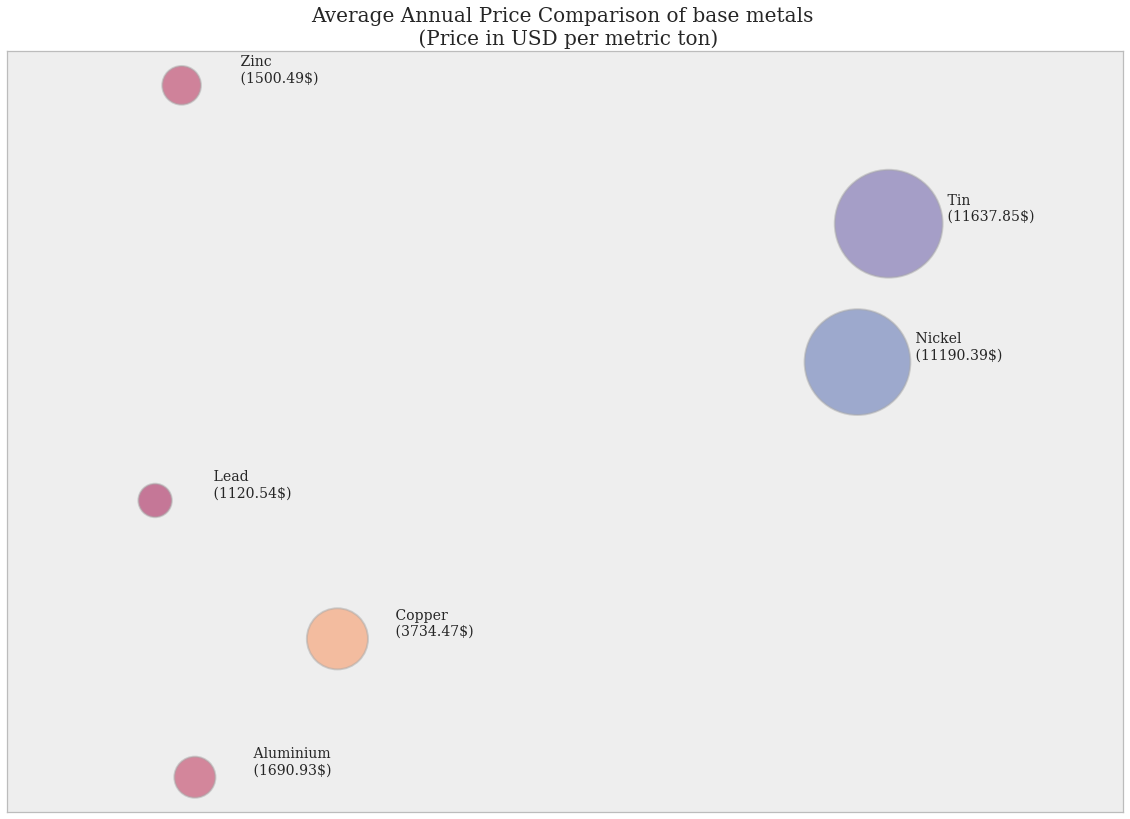

In [60]:
# Price comparison of precious metals
# Average Annual price of precious metals
basemetals_price =(
basemetals
.reset_index()
.melt(id_vars="Date",
       value_vars=["Aluminium","Copper","Lead","Nickel","Tin","Zinc"],
       var_name="Metal",
       value_name="Index")
.assign(Date = lambda df_ :pd.to_datetime(df_.Date),
         Year = lambda df_ : df_.Date.dt.year)
.groupby(['Metal','Year'])
.mean()['Index']
.reset_index()
.groupby('Metal')
.mean()['Index']
.reset_index()
)


plt.figure(figsize=(20, 14))
plt.scatter(basemetals_price['Index'], basemetals_price['Metal'], 
            s=basemetals_price['Index'], c=basemetals_price['Index'],
            alpha=0.5,cmap="Spectral",edgecolors="darkgrey", linewidth=2)
for i in range(len(basemetals_price['Metal'])):
    annotation_string = " "*13 + basemetals_price['Metal'][i]
    annotation_string += "\n"
    annotation_string += " "*12 + ' (' + str(round(basemetals_price['Index'][i],2)) + '$' + ')'
    plt.annotate(annotation_string,
                 xy=(basemetals_price['Index'][i],basemetals_price['Metal'][i]),
                 xytext=(basemetals_price['Index'][i],basemetals_price['Metal'][i]),
                 size = 14,ha='left',va='bottom')
plt.xlim((-1000, 15000))
plt.yticks([])
plt.xticks([])
plt.title("Average Annual Price Comparison of non-ferrous base metals \n (Price in USD per metric ton)",fontsize=20)

> #### Bubbleplot with seaborn

([], [])

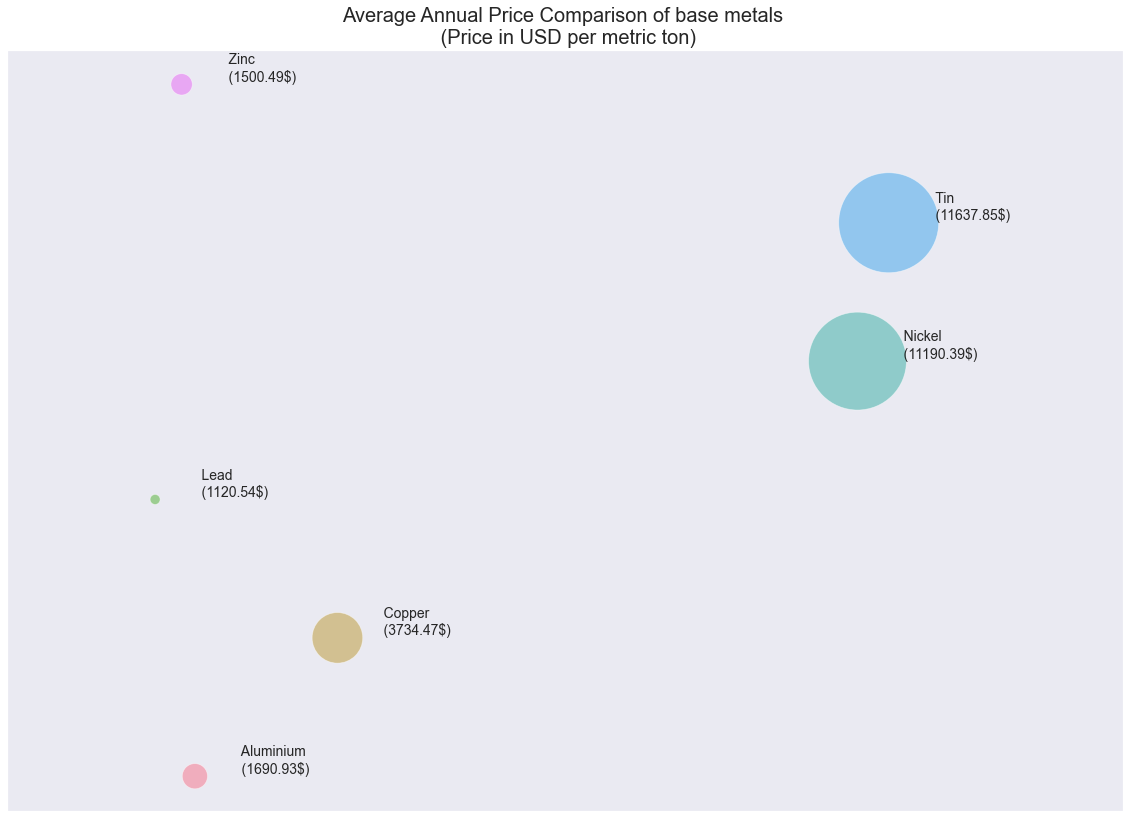

In [80]:
plt.figure(figsize=(20,14))
sns.set(style="darkgrid")
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="Index", 
                y="Metal",
                hue="Metal", 
                size="Index",
                sizes=(100, 10000),
                legend=False,
                alpha=0.5,
                palette="husl",
                data=basemetals_price).set_title("Average Annual Price Comparison of non-ferrous base metals \n (Price in USD per metric ton)",fontsize=20)
for i in range(len(basemetals_price['Metal'])):
    annotation_string = " "*12 + basemetals_price['Metal'][i]
    annotation_string += "\n"
    annotation_string += ' '*12 +'(' + str(round(basemetals_price['Index'][i],2)) + '$' + ')'
    plt.annotate(annotation_string,
                 xy=(basemetals_price['Index'][i],basemetals_price['Metal'][i]),
                 xytext=(basemetals_price['Index'][i],basemetals_price['Metal'][i]),
                 size = 14,ha='left',va='bottom')
plt.xlim((-1000, 15000))
plt.xlabel(None)
plt.ylabel(None)
plt.yticks([])
plt.xticks([])

#### Heatmap : CPI

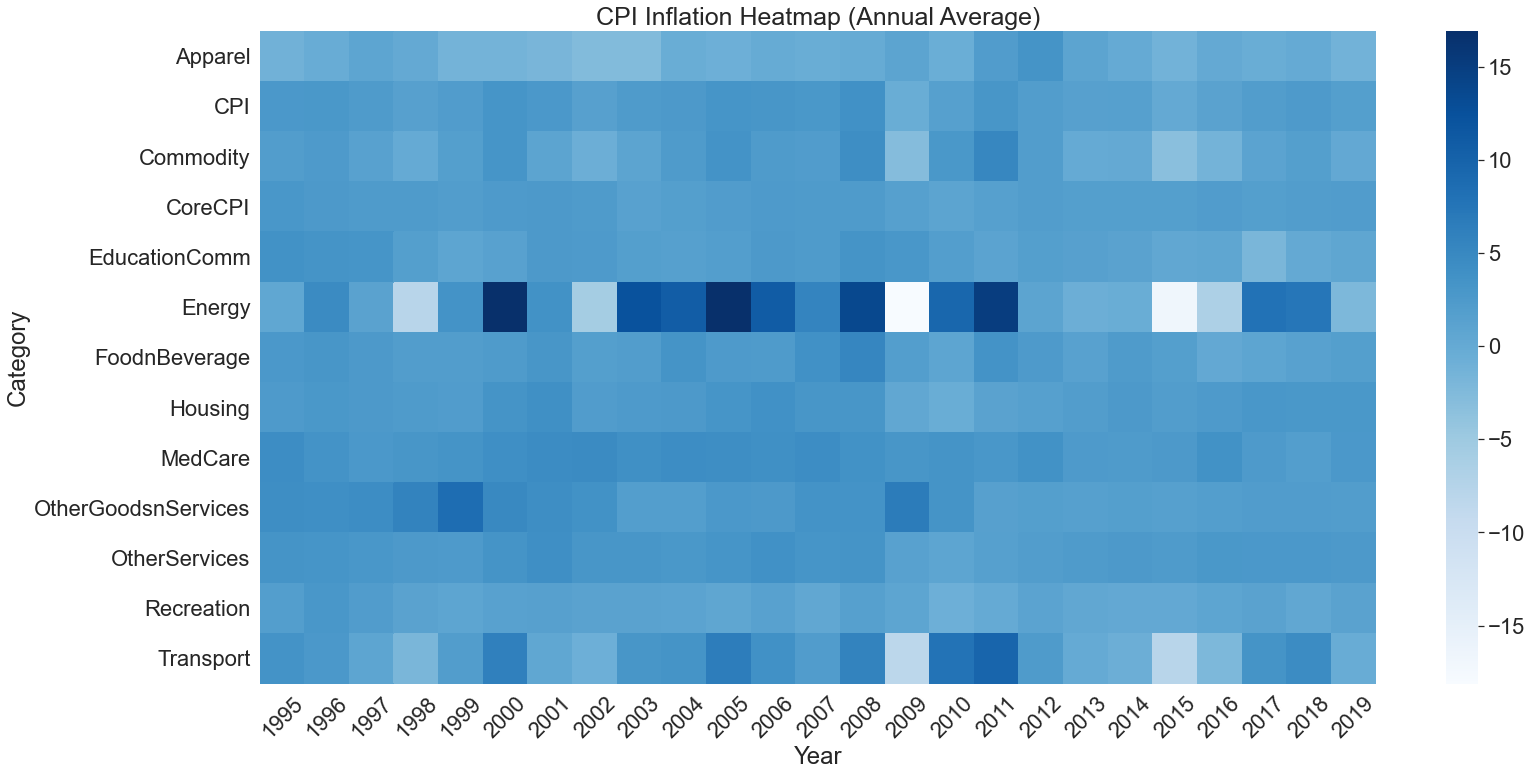

In [75]:
# Dataset for generating heatmap of CPI Annual Average over the years
cpi_heatmap =(
cpi_annualavg
.pivot(index='Category', columns='Year', values='AnnualAvgChange')
.iloc[:,1:]
)

# Heatmap of CPI values of categories over the years
sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=(25, 12))
ax = sns.heatmap(cpi_heatmap, 
                linewidth=0.0001,
                cmap="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("CPI Inflation Heatmap (Annual Average)",fontsize=25)
plt.show()